C:\Users\sampr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[18.975725 19.027175 19.078625 19.130075 19.181525 19.232975 19.284425
 19.335875 19.387325 19.438775 19.490225 19.541675 19.593125 19.644575
 19.696025 19.747475 19.798925 19.850375 19.901825 19.953275 20.004725
 20.056175 20.107625 20.159075 20.210525 20.261975 20.313425 20.364875
 20.416325 20.467775 20.519225 20.570675 20.622125 20.673575 20.725025
 20.776475 20.827925 20.879375 20.930825 20.982275 21.033725 21.085175
 21.136625 21.188075 21.239525 21.290975 21.342425 21.393875 21.445325
 21.496775 21.548225 21.599675 21.651125 21.702575 21.754025 21.805475
 21.856925 21.908375 21.959825 22.011275 22.062725 22.114175 22.165625
 22.217075 22.268525 22.319975 22.371425 22.422875 22.474325 22.525775
 22.577225 22.628675 22.680125 22.731575 22.783025 22.834475 22.885925
 22.937375 22.988825 23.040275 23.091725 23.143175 23.194625 23.246075
 23.297525 23.348975 23.400425 23.451875 23.503325 23.554775 23.606225
 23.657675 23.709125 23.760575 23.812025 23.863475 23.914925 23.966375
 24.01

arg,loc,scale (0.21431564497493877,) 12.516330563641468 10.33830410030749
(200,)
arg,loc,scale (486.8363091523702,) 18.949227553286825 1966.7773310253406
(200,)
arg,loc,scale () 17.898002244503132 3.267082804634997
(200,)
arg,loc,scale (1117.7793709701355, 12.51294084793783) -1.7364092480677604 16.531918842810022
(200,)
arg,loc,scale (0.9152569379493534,) 18.88300831081137 4.77050936172974
(200,)
arg,loc,scale (2.9198605317440425, 2.5964793321916723e-08) 18.94601322995809 1.3559500152668325
(200,)
arg,loc,scale (351.2567137567131, 688.3585497530191, 24.88393251519988) -1.0502602818986193 22.474319344922478
(200,)
arg,loc,scale (62.99618434710257, 30.501035209372176) -0.26041781555144483 0.7563779286240817
(200,)
arg,loc,scale () 23.09262295081967 2.2443681683984593
(200,)
arg,loc,scale (5.150009257465317,) 0.10005714198099414 18.849942857647974
(200,)
arg,loc,scale (0.8521718119533641,) 23.09261505012909 2.3446788635259015
(200,)
arg,loc,scale (1.0662989528768636,) 18.949114117119365 1

C:\Users\sampr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

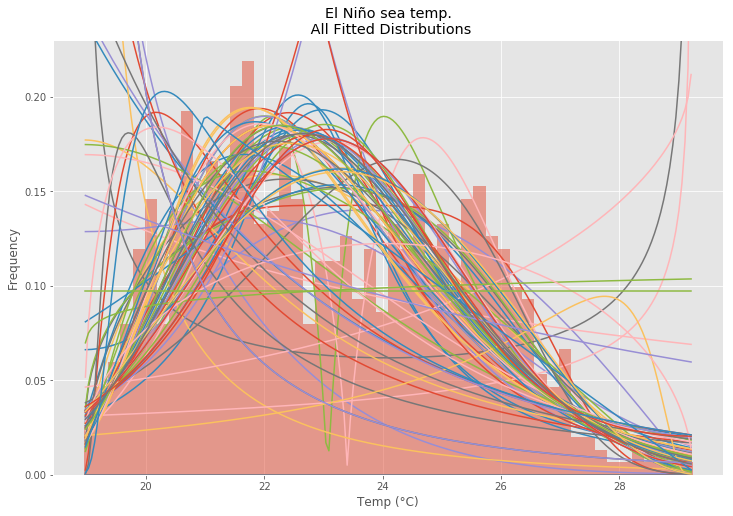

In [13]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    print(x)
    print(y)

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                print("arg,loc,scale",arg,loc,scale)
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                print(pdf.shape)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [10]:
data

0      23.11
1      24.20
2      25.37
3      23.86
4      23.03
5      21.57
6      20.63
7      20.15
8      19.67
9      20.03
10     20.02
11     21.80
12     24.19
13     25.28
14     25.60
15     25.37
16     24.79
17     24.69
18     23.86
19     22.32
20     21.44
21     21.77
22     22.33
23     22.89
24     24.52
25     26.21
26     26.37
27     24.73
28     23.71
29     22.34
       ...  
702    23.02
703    22.14
704    21.60
705    21.39
706    21.54
707    22.73
708    24.39
709    25.53
710    25.48
711    25.84
712    24.95
713    24.09
714    23.09
715    22.03
716    21.48
717    21.64
718    21.99
719    23.21
720    24.70
721    26.16
722    26.54
723    26.04
724    24.75
725    23.26
726    21.11
727    19.49
728    19.28
729    19.73
730    20.44
731    22.07
Length: 732, dtype: float64